In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [ ]:
df=pd.read_csv("trains.csv")
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(42000, 785)

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

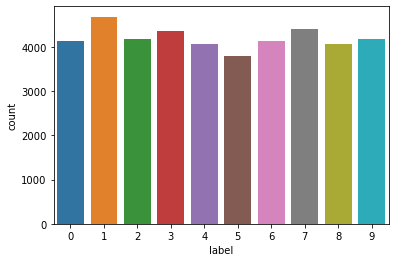

In [ ]:
sns.countplot(data=df,x=y)

In [ ]:
df.sample(1)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9740,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Number is 5 5')

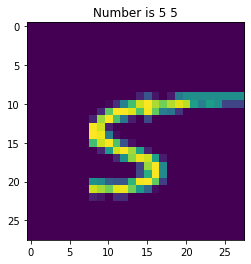

In [ ]:
plt.imshow(x.iloc[244,:].values.reshape(28,28))
plt.title(f"Number is 5 {y[244]}")

Text(0.5, 1.0, 'Number is 5 8')

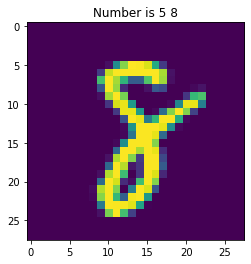

In [ ]:
plt.imshow(x.iloc[300,:].values.reshape(28,28))
plt.title(f"Number is 5 {y[300]}")

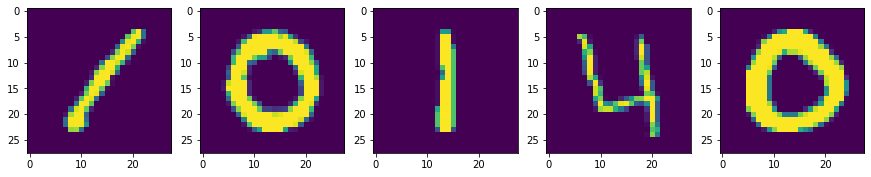

In [ ]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(28,28))
plt.show()

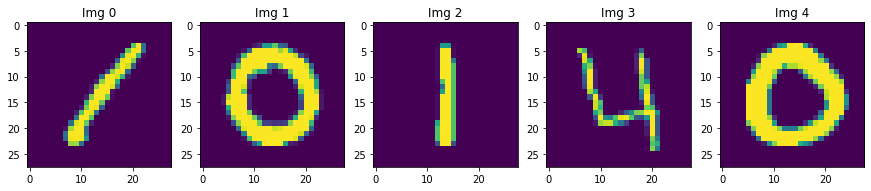

In [ ]:
plt.figure(figsize=(15,10))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.imshow(x.iloc[i,:].values.reshape(28,28))
    plt.title(f"Img {i}")
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
knn=KNeighborsClassifier()

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
knn_accuracy=accuracy_score(y_test,y_pred)
knn_accuracy

0.966031746031746

In [ ]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
std=StandardScaler()
x_train_trf=std.fit_transform(x_train)
x_test_trf=std.transform(x_test)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA()

In [ ]:
x_train_pca=pca.fit_transform(x_train_trf)
x_test_pca=pca.transform(x_test)

In [ ]:
x_train_pca.shape

(29400, 784)

In [ ]:
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_pca=knn.predict(x_test_pca)

In [ ]:
accuracy_score(y_test,y_pred_pca)

0.789047619047619

In [ ]:
for i in range(1,785):
    pca=PCA(n_components=i)
    x_train_pca=pca.fit_transform(x_train_trf)
    x_test_pca=pca.transform(x_test)
    knn.fit(x_train_pca,y_train)
    y_pred_pca=knn.predict(x_test_pca)
    print(f"Iteration :{i} {accuracy_score(y_test,y_pred_pca)}")

Iteration :1 0.1827777777777778
Iteration :2 0.13476190476190475
Iteration :3 0.2176984126984127
Iteration :4 0.25023809523809526
Iteration :5 0.35428571428571426
Iteration :6 0.3933333333333333
Iteration :7 0.44301587301587303
Iteration :8 0.47634920634920636
Iteration :9 0.4990476190476191
Iteration :10 0.47174603174603175
Iteration :11 0.4657142857142857
Iteration :12 0.473968253968254
Iteration :13 0.5430158730158731
Iteration :14 0.5755555555555556
Iteration :15 0.5864285714285714
Iteration :16 0.5955555555555555
Iteration :17 0.5898412698412698
Iteration :18 0.5961904761904762
Iteration :19 0.5976984126984127
Iteration :20 0.6136507936507937
Iteration :21 0.6103968253968254
Iteration :22 0.6155555555555555
Iteration :23 0.6276984126984126
Iteration :24 0.628968253968254
Iteration :25 0.6544444444444445
Iteration :26 0.6673015873015873
Iteration :27 0.6685714285714286
Iteration :28 0.6702380952380952
Iteration :29 0.6731746031746032
Iteration :30 0.6745238095238095
Iteration :31 0

KeyboardInterrupt: 

In [ ]:
pca_dim= PCA(n_components=2)
x_train_pca=pca_dim.fit_transform(x_train_trf)
x_test_pca=pca_dim.transform(x_test)
x_train_pca.shape

(29400, 2)

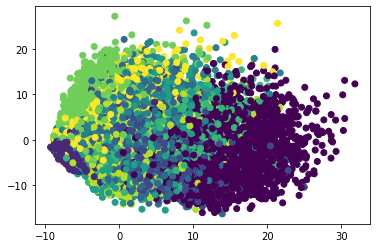

In [ ]:
#import plotly.express as px
plt.scatter(x_train_pca[:,0],x_train_pca[:,1],c=y_train)